<a href="https://colab.research.google.com/github/Cado87/Fruit-project/blob/main/Detection/YOLO/Finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Unzip folder from /content/drive/MyDrive/Datasets/Fruits/Dataset_yolo.zip
!unzip -q /content/drive/MyDrive/Datasets/Fruits/Dataset_yolo.zip -d /content/

Validation dataset

In [4]:
# Load a model
model = YOLO("yolo11n.pt")

# Validate the model
metrics = model.val(data="/content/data.yaml")
print('mAP50-95:', metrics.box.map)  # map50-95

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1310.8±929.6 MB/s, size: 2708.1 KB)
val: Scanning data/labels/val... 11 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 11/11 107.2it/s 0.1s
val: New cache created: data/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.9s/it 4.9s
                   all         11         11          0          0          0          0
                person          1          1          0          0          0          0
               bicycle          1          1          0          0          0          0
                   car          1          1          0          0          0          0
            motorcycle          1          1          0          0          0          0
              airplane

This will show very low mAP because it's mixing COCO dataset classes with fruit dataset classes. It'll need to retrain

**See some inference examples without training**

In [33]:
import os
import random
from PIL import Image

def visualize_examples(yolo_file, conf_threshold=0.5):
  # Load a pretrained YOLO11n model
  model = YOLO(yolo_file)

  # Path to the train2017 folder
  image_folder = "/content/data/images/val"

  # Get a list of all image files in the folder
  image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

  # Select 5 random image files
  random_images = random.sample(image_files, 5)

  # Process and visualize the selected images
  for image_file in random_images:
      # Construct the full image path
      image_path = os.path.join(image_folder, image_file)

      # Run inference on the image with the specified confidence threshold
      results = model([image_path], conf=conf_threshold)  # results list

      # Visualize the results
      for i, r in enumerate(results):
          # Plot results image
          im_bgr = r.plot()  # BGR-order numpy array
          im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

          # Show results to screen (in supported environments)
          r.show()


In [ ]:
visualize_examples("/content/yolo11n.pt")

you can see that some fruits are incorrectly classified because de model was not trained on these classes

**Training YOLO with fruit dataset**

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="data.yaml", epochs=30, imgsz=640, profile=True)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

**Analyze training output to see how the training was:** /content/runs/detect/train

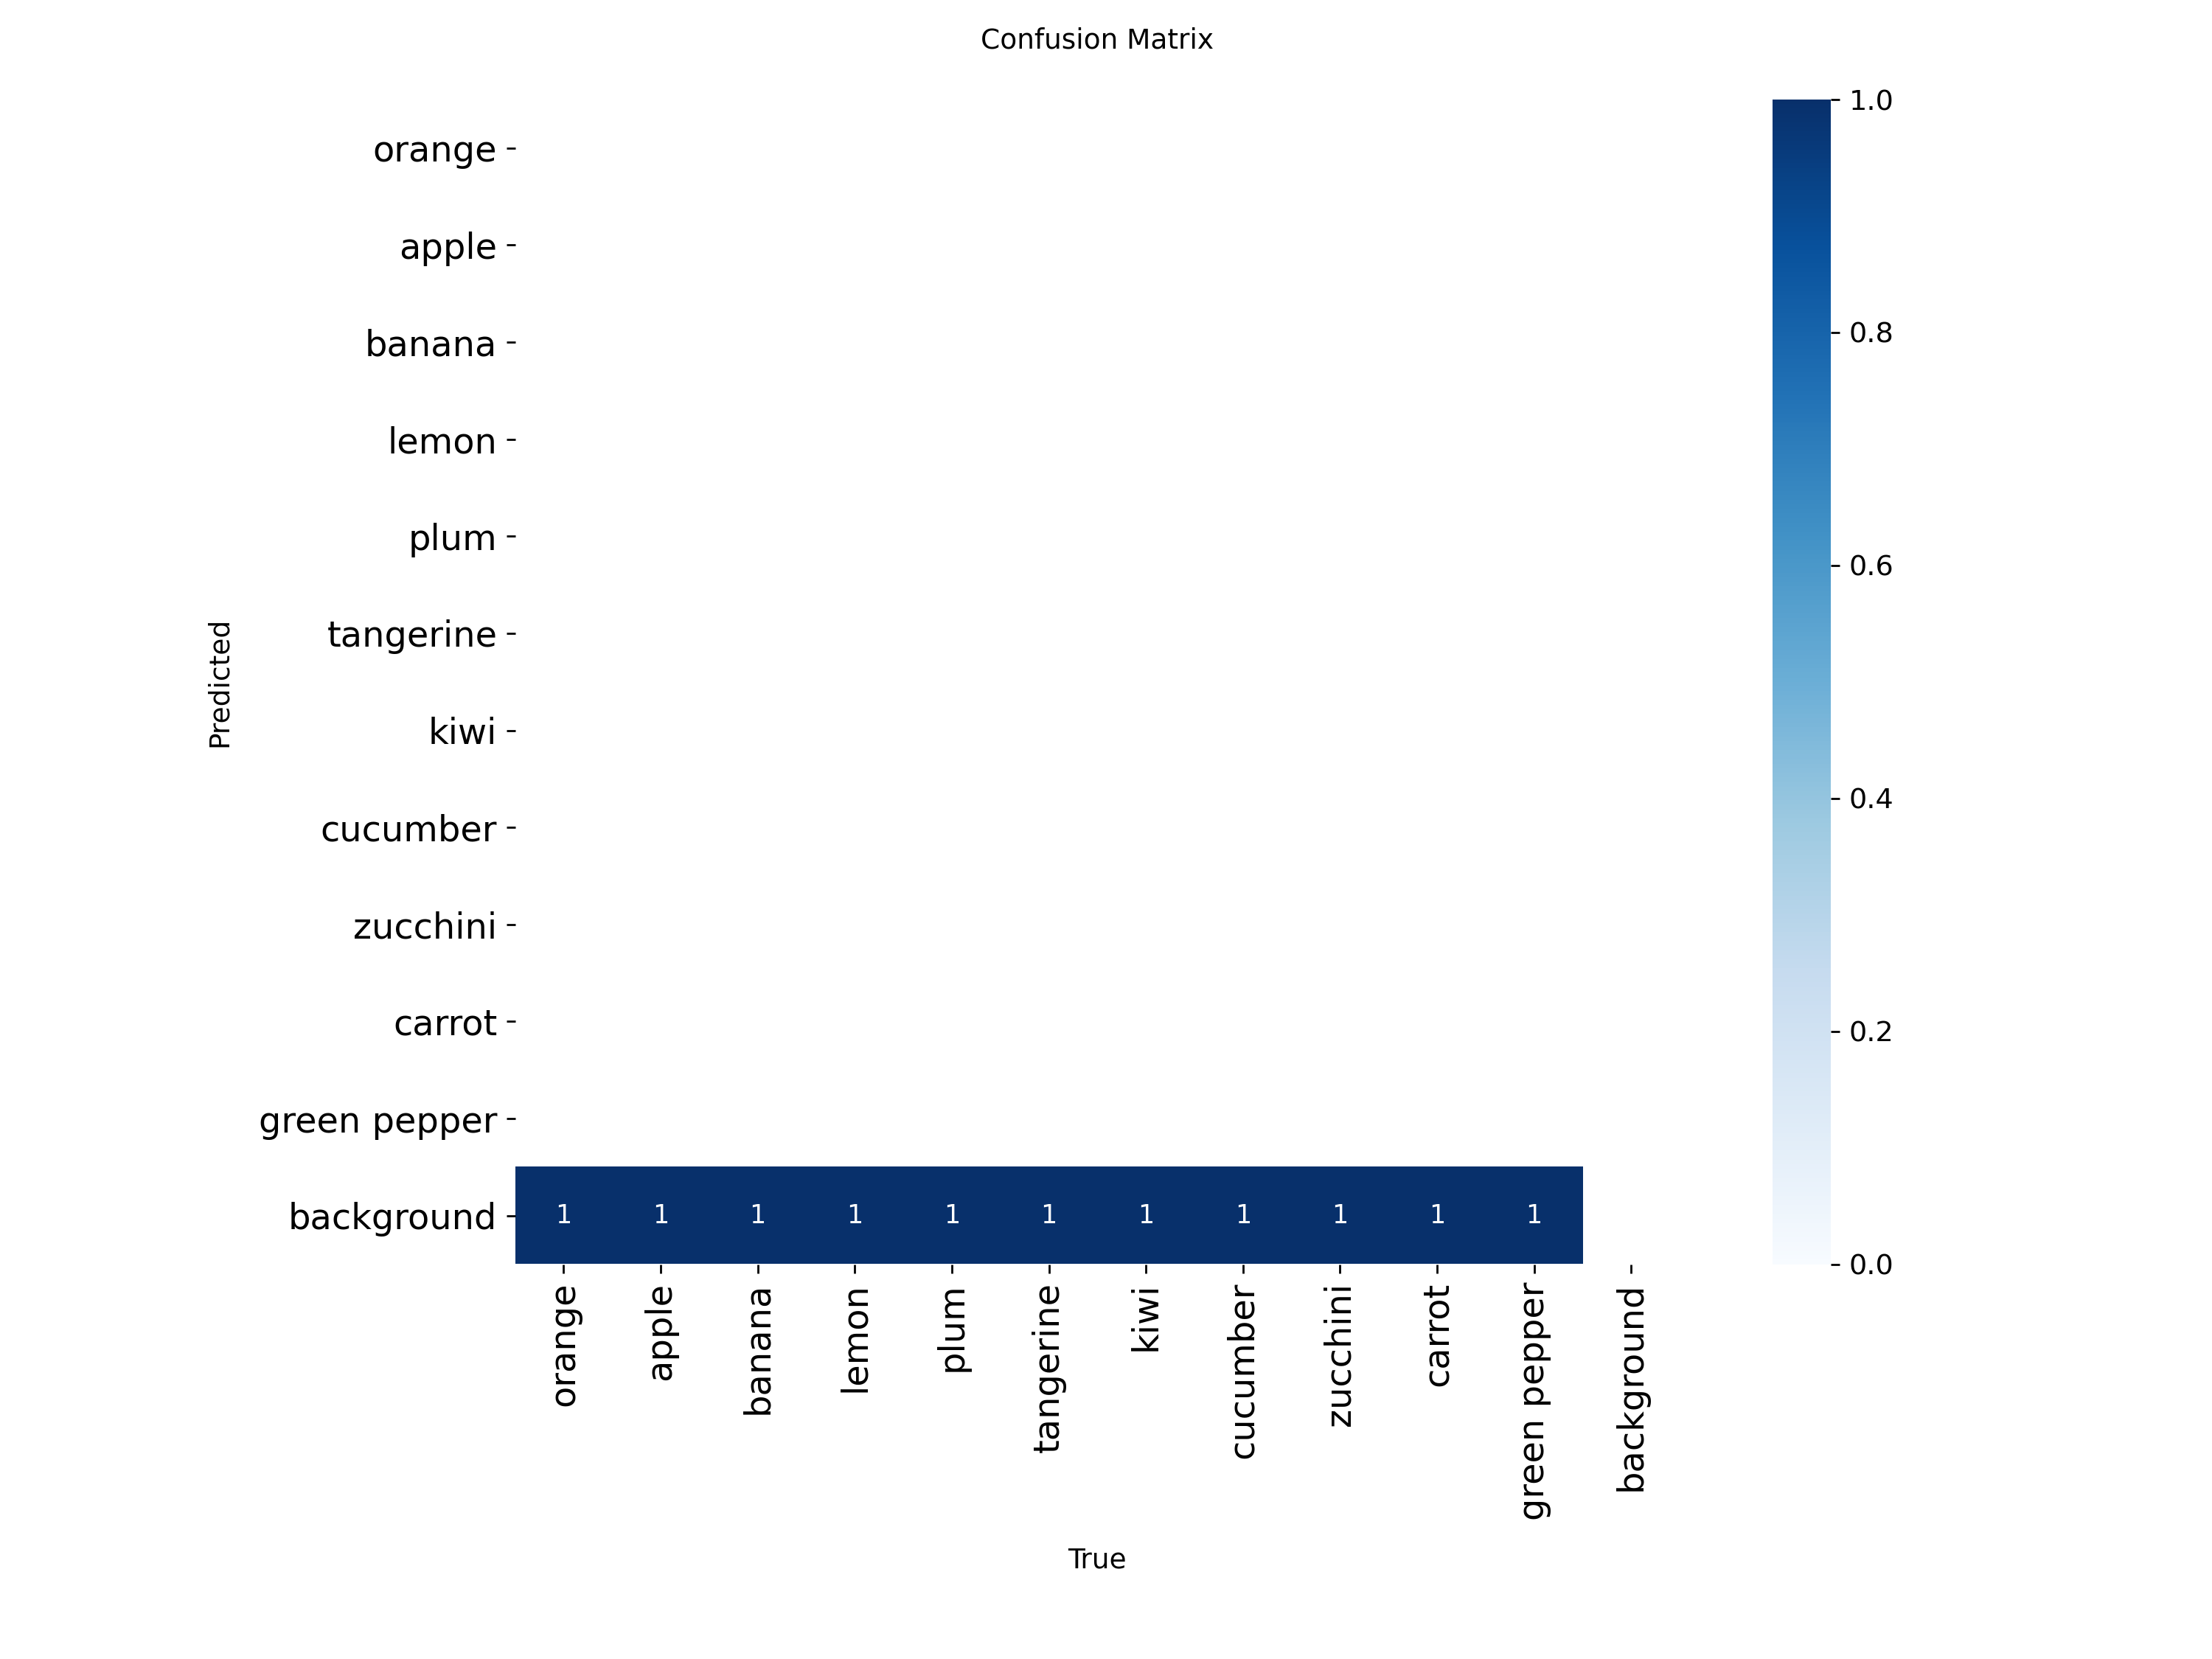

In [29]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/confusion_matrix.png')

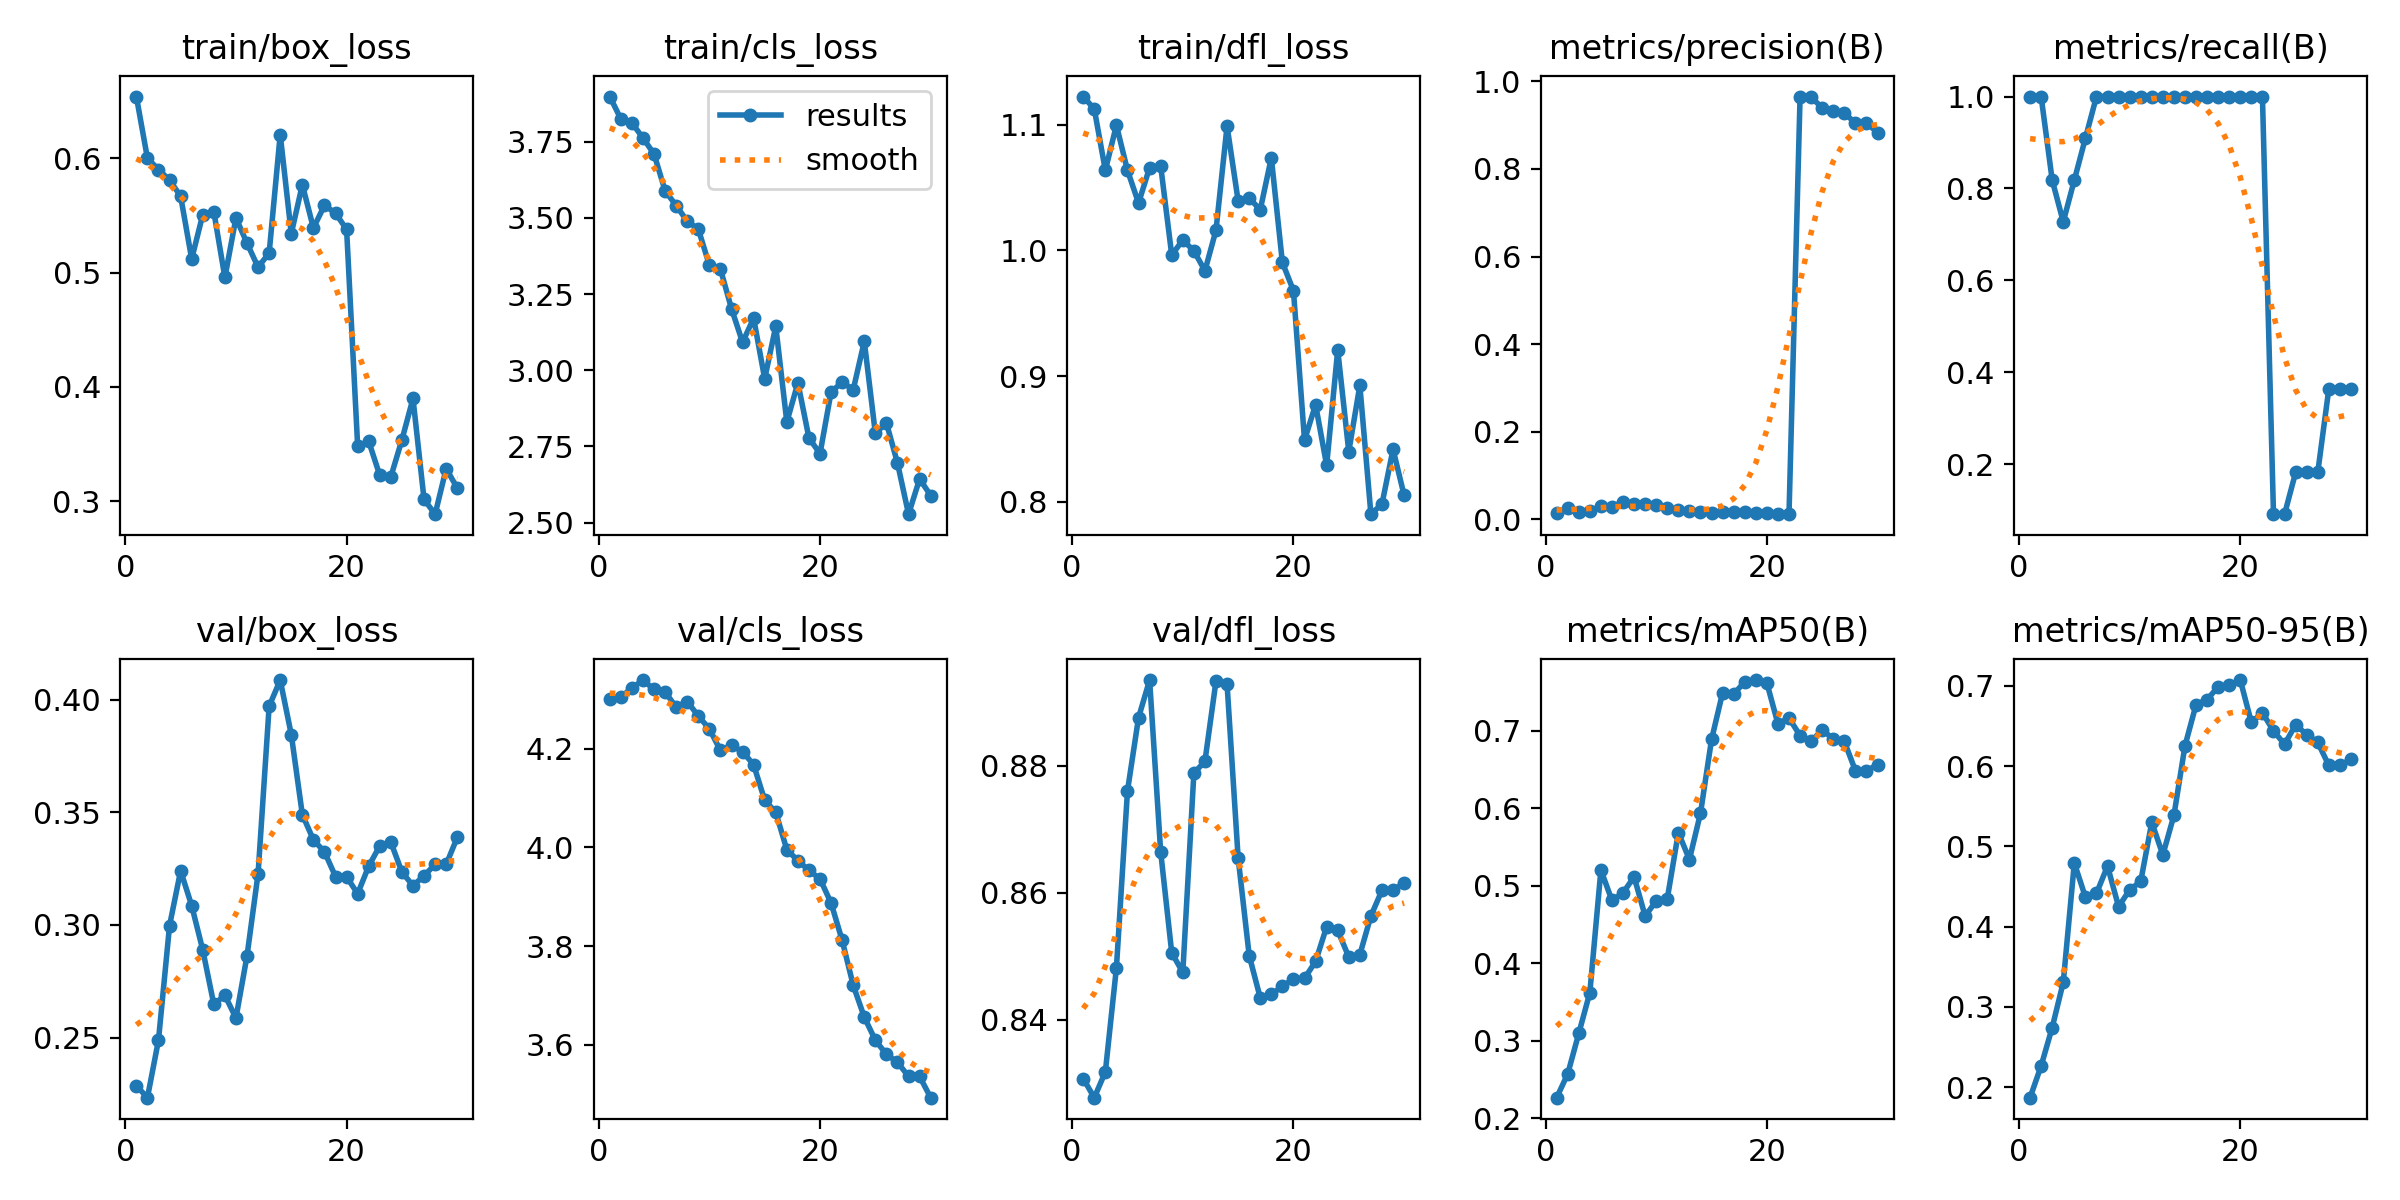

In [30]:
Image(filename='/content/runs/detect/train/results.png')

**Validation after training**

In [ ]:
# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print('mAP50-95:', metrics.box.map)  # map50-95
print('mAP50: ',metrics.box.map50)  # map50
print('mAP75: ', metrics.box.map75)  # map75
print('mAP50-95 per category', metrics.box.maps)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,584,297 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2951.1±91.8 MB/s, size: 2616.5 KB)
val: Scanning data/labels/val.cache... 11 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 11/11 13.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.0s/it 4.0s
                   all         11         11      0.909      0.273      0.799      0.745
                orange          1          1          1          0      0.995      0.995
                 apple          1          1      0.723          1      0.995      0.796
                banana          1          1          1          0      0.995      0.995
                 lemon          1          1          1          0      0.332      0.332
                  plum          1          1          1        

**Visualize some inference examples**

In [ ]:
#Visualize examples trained model
visualize_examples("/content/runs/detect/train/weights/best.pt", conf_threshold=0.003)